# **Parte B** 

## Implementar programas para implementação dos autômatos na Figura 6, obtendo visualizações semelhantes às da Figura 7.

In [26]:
automata_A = np.array([[0.9, 0.9],
                      [0.1, 0.1]]) 

automata_B = np.array([[0.2, 0.2],
                      [0.8, 0.8]])

automata_C = np.array([[0.5, 0.5],
                      [0.5, 0.5]])

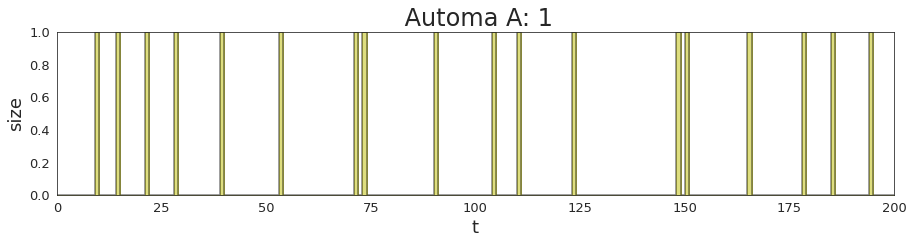

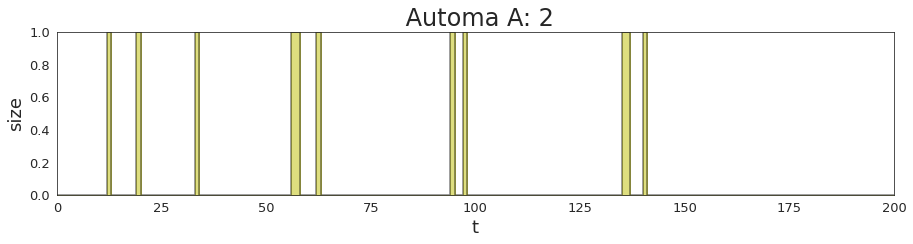

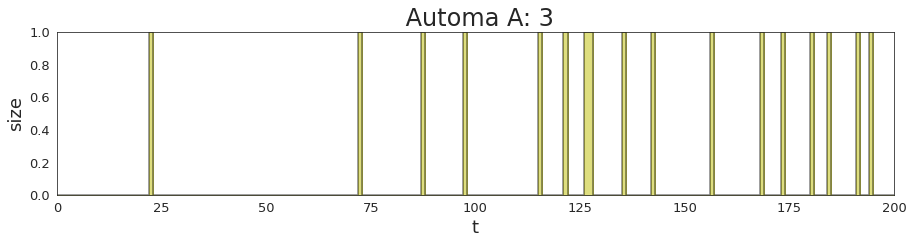

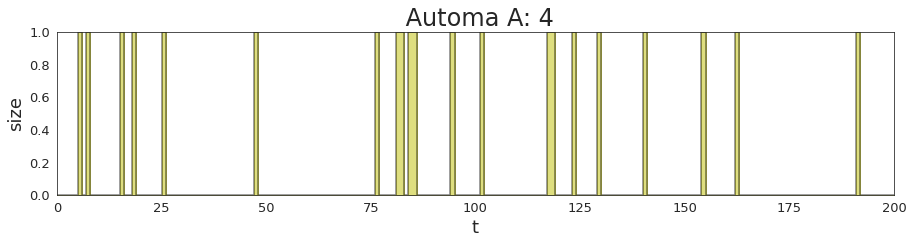

In [30]:
for i in range(4):
    
    signal = probabilistic_automata(automata_A, 0, 200, seed = i*10)
    plot_square_signal(signal, title = f' Automa A: {i+1}', size = (15,3), celling = 0, alphas = (0.5, 0.5))

    plt.savefig(f"automata_a{i}.png", dpi=150)

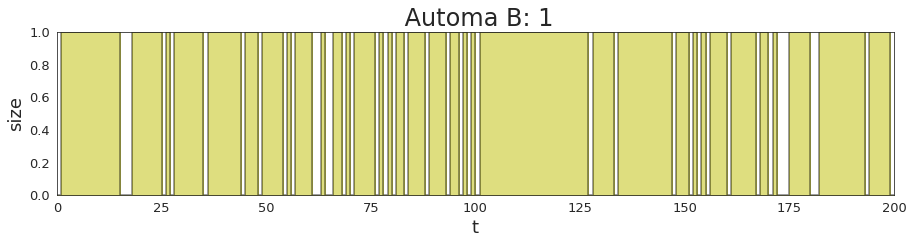

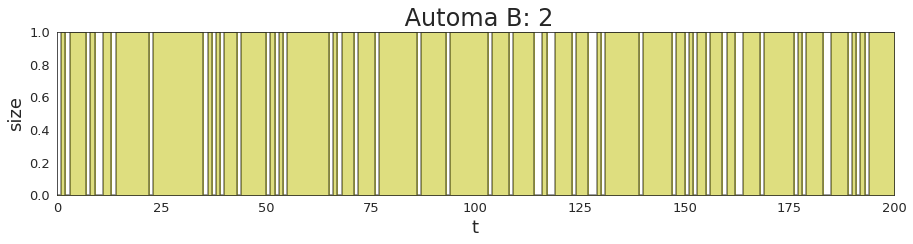

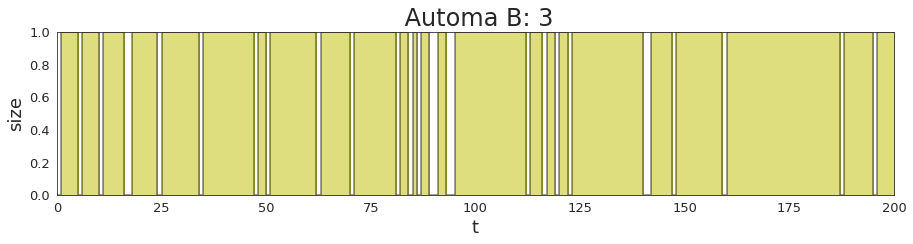

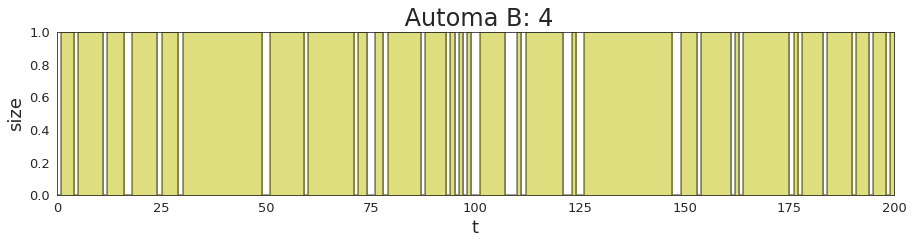

In [31]:
for i in range(4):
    
    signal = probabilistic_automata(automata_B, 0, 200, seed = i*10)
    
    plot_square_signal(signal, title = f' Automa B: {i+1}', size = (15,3), celling = 0, alphas = (0.5, 0.5))
    plt.savefig(f"automata_b{i}.png", dpi=150)

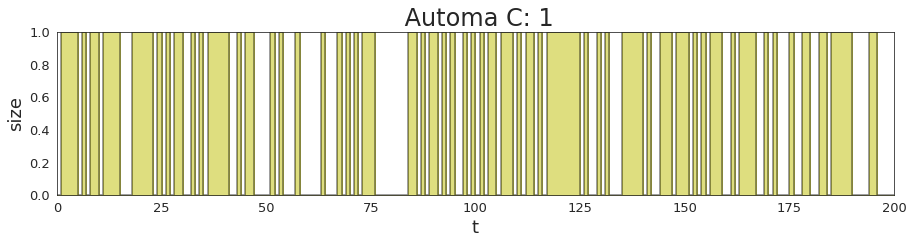

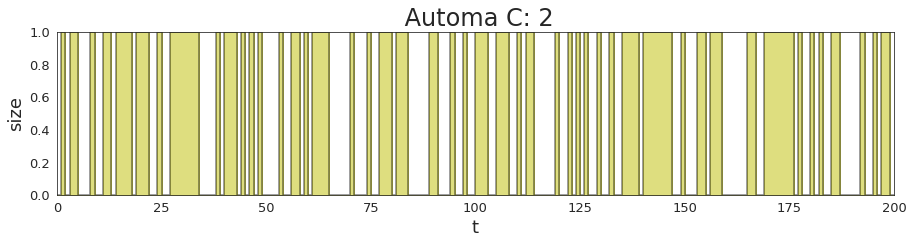

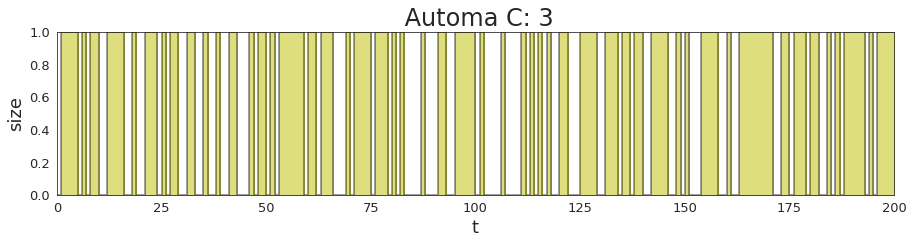

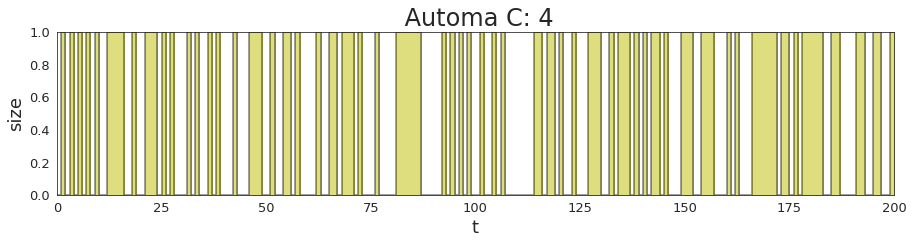

In [32]:
for i in range(4):
    
    signal = probabilistic_automata(automata_C, 0, 200, seed = i*10)
    
    plot_square_signal(signal, title = f' Automa C: {i+1}', size = (15,3), celling = 0, alphas = (0.5, 0.5))

    plt.savefig(f"automata_c{i}.png", dpi=150)

## Combinar os autômatos da Figura 6 de forma a obter resultados semelhantes aos da Figura 10.

In [35]:
automata_D = np.array([[0.9, 0.882, 0, 0, 0, 0.01],
                       [0.1, 0.098, 0, 0, 0, 0],
                       [0, 0.02, 0.2, 0.194, 0, 0],
                       [0, 0, 0.8, 0.776, 0, 0],
                       [0, 0, 0, 0.03, 0.5, 0.495],
                       [0, 0, 0, 0, 0.5, 0.495]])

In [36]:
automata_D

array([[0.9  , 0.882, 0.   , 0.   , 0.   , 0.01 ],
       [0.1  , 0.098, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.02 , 0.2  , 0.194, 0.   , 0.   ],
       [0.   , 0.   , 0.8  , 0.776, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.03 , 0.5  , 0.495],
       [0.   , 0.   , 0.   , 0.   , 0.5  , 0.495]])

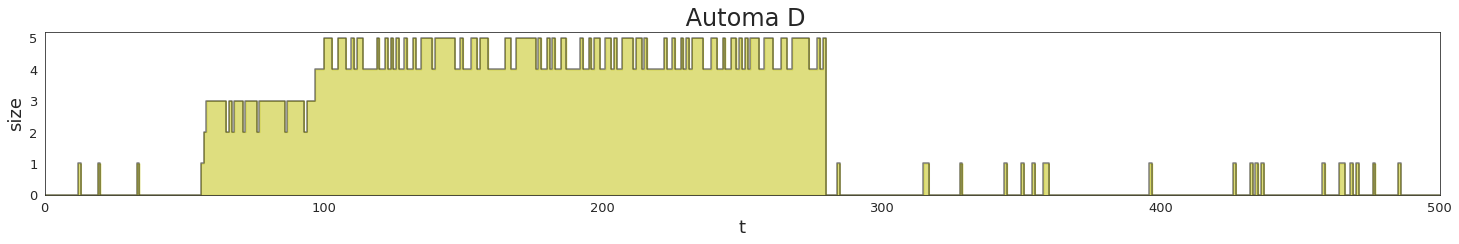

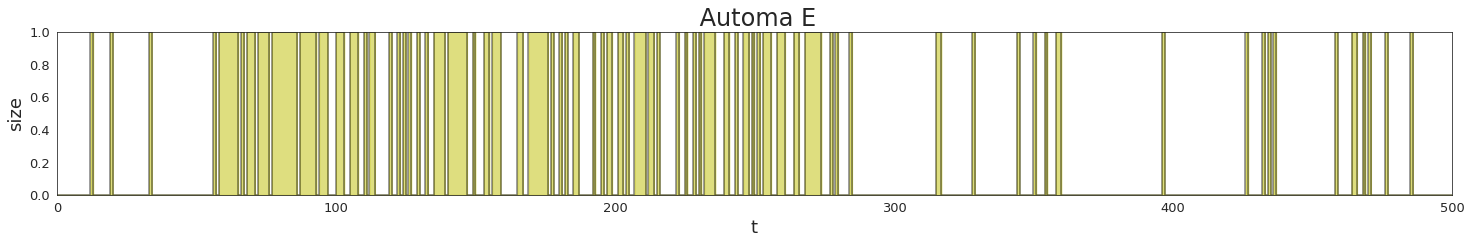

In [38]:
signal_D = probabilistic_automata(automata_D, 0, 500, seed = 10)
signal_E = np.copy(signal_D)

for i in range(len(signal_E)):
    
    if signal_E[i] in [2, 4]:
        
        signal_E[i] = 0
    
    elif signal_E[i] in [3, 5]:

        signal_E[i] = 1

plot_square_signal(signal_D, title = f' Automa D', size = (25,3), celling = 0.2, alphas = (0.5, 0.5))
plt.savefig(f"automata_d.png", dpi=150)
plot_square_signal(signal_E, title = f' Automa E', size = (25,3), celling = 0, alphas = (0.5, 0.5))
plt.savefig(f"automata_e.png", dpi=150)

## Obter padrões geométricos como os das Figuras 11 e 12.

In [39]:
signal_A = probabilistic_automata(automata_A, 0, 200, seed = 42)
signal_B = probabilistic_automata(automata_A, 0, 200, seed = 50)
signal_C = probabilistic_automata(automata_C, 0, 200, seed = 10)

In [40]:
im_signal_A = np.meshgrid(signal_A, signal_A)
im_signal_B = np.meshgrid(signal_A, signal_B)
im_signal_C = np.meshgrid(signal_A, signal_C)

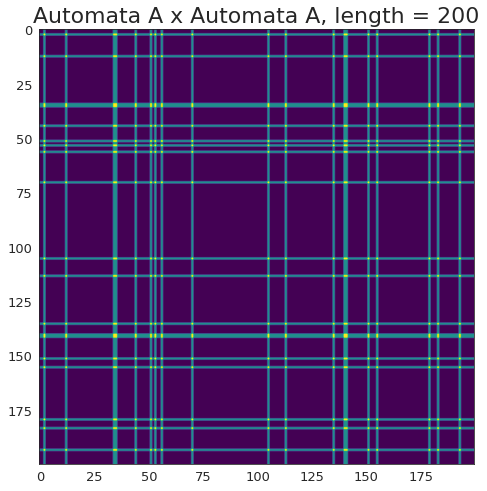

In [43]:
plt.title('Automata A x Automata A, length = 200', fontsize = 22)

plt.imshow(im_signal_A[0]+im_signal_A[1], cmap = 'viridis')
plt.savefig(f"qua_aa.png", dpi=150)

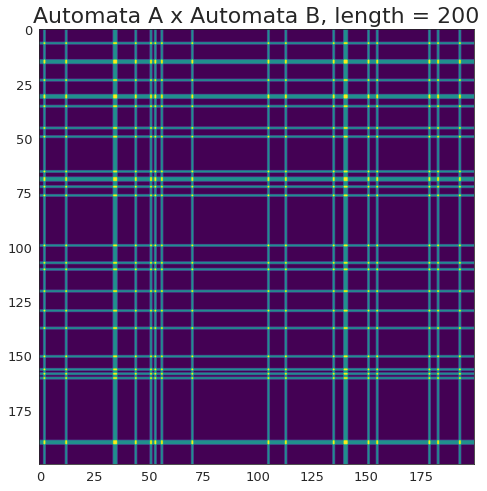

In [44]:
plt.title('Automata A x Automata B, length = 200', fontsize = 22)

plt.imshow(im_signal_B[0]+im_signal_B[1], cmap = 'viridis')
plt.savefig(f"qua_ab.png", dpi=150)

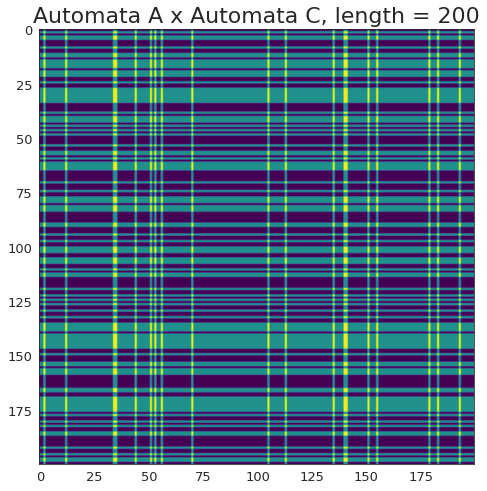

In [45]:
plt.title('Automata A x Automata C, length = 200', fontsize = 22)

plt.imshow(im_signal_C[0]+im_signal_C[1], cmap = 'viridis')
plt.savefig(f"qua_ac.png", dpi=150)

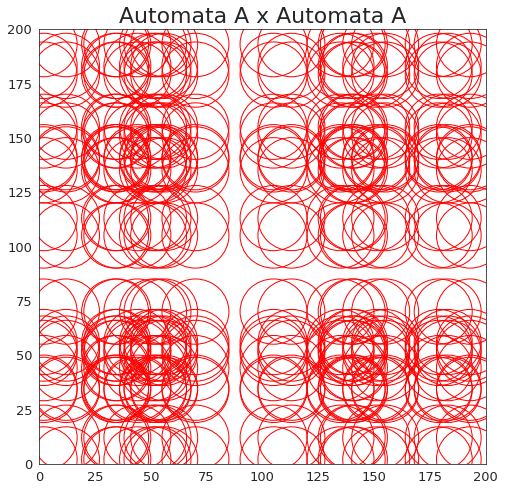

In [53]:
circles_img = plot_in_circles(signal_A, signal_A, r = 15, title = 'Automata A x Automata A')

## Obter as distribuições de números de 1’s gerados pelos autômatos da Figura 6, de forma compatível com os resultados da Figura 13.

In [55]:
lengths = np.arange(500, 2250, 250) # signal size
na = 1000 # sample size

In [61]:
A_frequencys = []
B_frequencys = []
C_frequencys = []

In [62]:
for length in lengths:
    
    A_frequencys.append(frequency_automata_sample(automata_A, length, na))
    B_frequencys.append(frequency_automata_sample(automata_B, length, na))
    C_frequencys.append(frequency_automata_sample(automata_C, length, na))

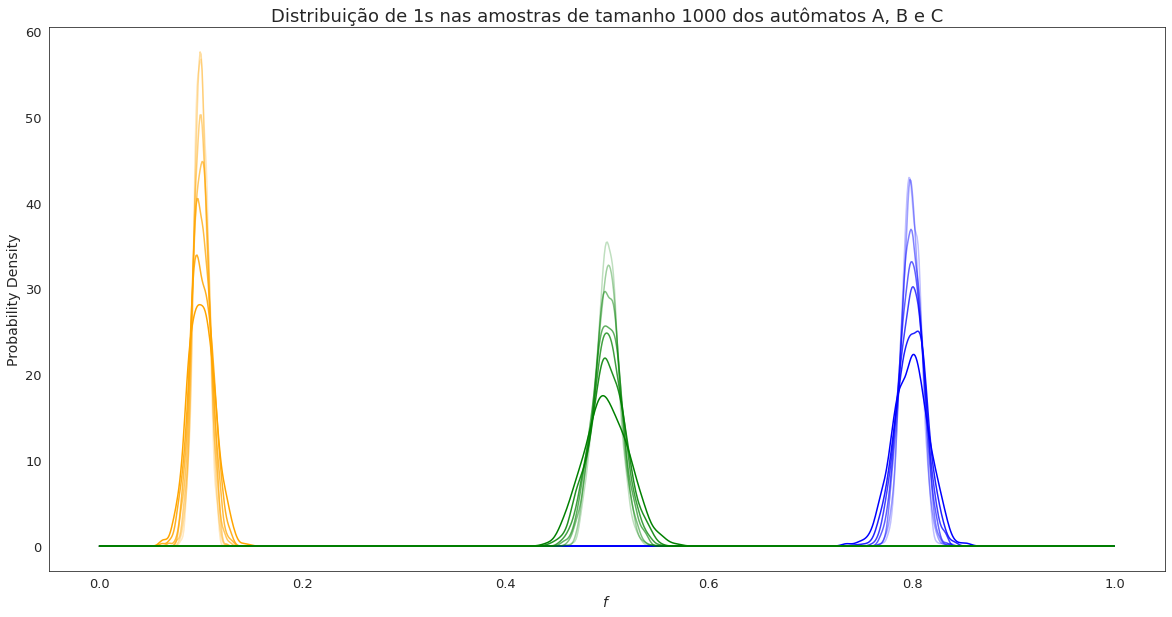

In [64]:
fig = plt.figure(figsize = (20, 10))

plt.title(f'Distribuição de 1s nas amostras de tamanho {na} dos autômatos A, B e C')

plt.xlabel('$ f $')
plt.ylabel('Probability Density')

x = np.arange(0,1, 0.001)

dalpha = 1/8

k = 8

for i in A_frequencys:
    kde = gaussian_kde(i)
    plt.plot(x, kde(x), color ='orange', alpha = dalpha*k)
    k -= 1
    
k = 8
    
for i in B_frequencys:
    kde = gaussian_kde(i)
    plt.plot(x, kde(x), color ='b', alpha = dalpha*k)
    k -= 1

k = 8

for i in C_frequencys:
    kde = gaussian_kde(i)
    plt.plot(x, kde(x), color ='g', alpha = dalpha*k)
    k -= 1

plt.savefig(f"d_abc.png", dpi=150)

## **Funções Auxiliares**

In [13]:
def monte_carlo(v):
    
    r = np.random.uniform()
    
    n = len(v)
    
    Fv = 0

    for i in range(n):
        
        Fv += v[i]
        
        if Fv > r:
            
            return i
    
    return n-1

In [14]:
def probabilistic_automata(matrix, init, length, seed = 42):
    
    np.random.seed(seed)
    
    signal = np.zeros(length, dtype = int)
    signal[0] = init
    
    last = init
    
    for i in range(1, length):
        
        last = monte_carlo(matrix[:, last])
        
        signal[i] = last
    
    return signal

In [15]:
def signal_to_square_1D(signal):
    
    n = len(signal)
    
    x = []
    y = []
    
    for i in range(n):
        
        x.append(i)
        y.append(signal[i])
        
        x.append(i + 1)
        y.append(signal[i])
        
    return x, y  


In [16]:
def plot_square_signal(signal, 
                       background = 'w', 
                       line_color = 'black', 
                       fill_color = 'y', 
                       size = (15, 5), 
                       alphas = (1, 1), 
                       title = 'Signal', 
                       xlabel = 't', 
                       ylabel = 'size', 
                       celling = 1):
    
    x, y = signal_to_square_1D(signal)
    
    fig = plt.figure(figsize = size)
    
    plt.plot(x, y, c = line_color, alpha = alphas[0])
    plt.fill_between(x, 0, y, color=fill_color, alpha = alphas[1])
    
    plt.xlim((0, max(x)))
    plt.ylim((0, max(y)+celling))
    
    plt.title(title, fontsize = 24)
    
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18)
    
    ax = plt.gca()
    ax.set_facecolor(background)
    

In [52]:
def plot_in_circles(X,
                    Y, 
                    r, 
                    size = (8,8),
                    title = '', 
                    xlabel = '', 
                    ylabel = ''):
    
    nx, ny = X.shape[0], Y.shape[0]
    
    fig, ax = plt.subplots(figsize = size)
    
    ax.set_title(title, fontsize = 22)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    for x in np.arange(nx):
        for y in np.arange(ny):
            
            if X[x] == 1 and Y[y] == 1:
                
                c = plt.Circle((x, y), r, color='r', fill= False)
                ax.add_patch(c)
        
    plt.xlim((0, nx))
    plt.ylim((0, ny))
    
    plt.savefig(f"c_aa.png", dpi=150)

In [18]:
def frequency_automata_sample(automata, signal_size, sample_size, init = 0):
    
    frequencys = np.zeros(sample_size)
    
    for i in np.arange(sample_size):
    
        signal = probabilistic_automata(automata, init, signal_size, seed = i)
        
        frequencys[i] = signal.mean()
    
    return frequencys

## **Blibliotecas**

In [19]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
import seaborn as sns

In [22]:
from scipy.stats import gaussian_kde

In [23]:
%matplotlib inline

In [24]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [25]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

In [9]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]